# 4.4.2.1. Imbalance in binary classification metrics

Reproduction of Luque et al.'s experiments and extension to the sF1, hF1 and kUn metrics.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from metrics.unbalance import get_binary_cm, rescale_metric, perclass, get_binary_metrics_results
from metrics.classification import kappaU, MCC, Accuracy, F1c, sF1, hF1, GM
from functools import partial

In [2]:
binary_metrics = {
    'kUn': partial(rescale_metric, kappaU), 
    'MCCn': partial(rescale_metric, MCC), 
    'Acc': Accuracy, 
    'F1p': partial(perclass, F1c, c=1),
    'hF1': hF1, 
    'sF1': sF1, 
    'GM': GM 
}

In [3]:
deltas = np.array([-0.99] + list(np.arange(-0.9, 0.91, 0.1)) + [0.99]) # from extreme imbalance to balance to extreme imbalance
lns = np.arange(0.01, 1.01, 0.01)
lps = np.arange(0.01, 1.01, 0.01)

In [ ]:
all_results = get_binary_metrics_results(binary_metrics, deltas, lns, lps)

In [ ]:
import pickle
# Save to reuse:
with open('./data/binary_metrics_results.pkl', 'wb') as fp:
   pickle.dump(all_results, fp)

In [4]:
import pickle
# Load to reuse
with open('./data/binary_metrics_results.pkl', 'rb') as fp:
    all_results = pickle.load(fp)

**Distributions of metric values depending on imbalance factor**

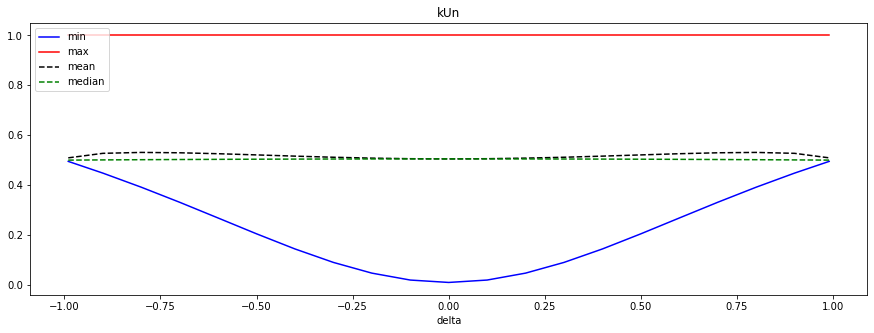

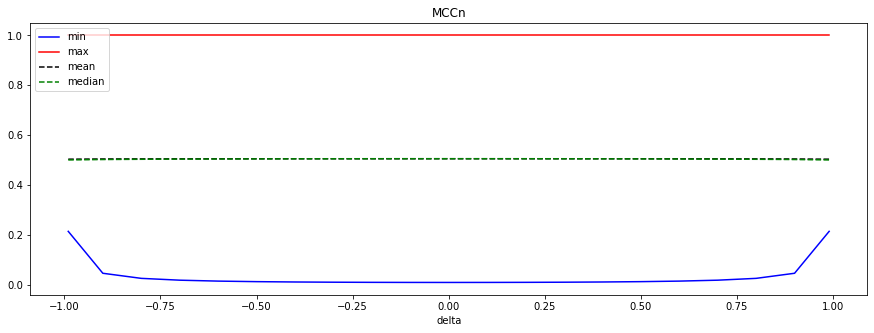

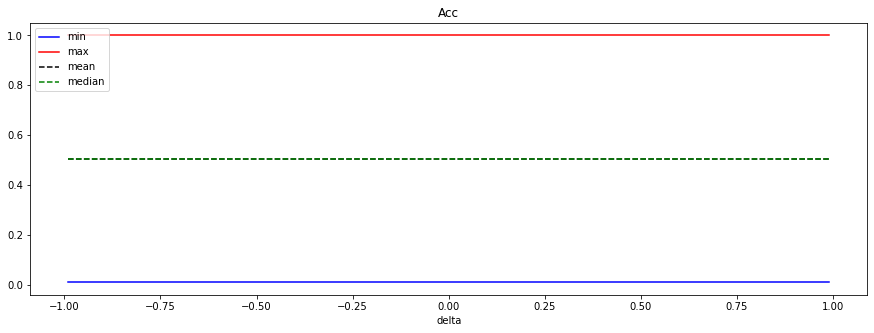

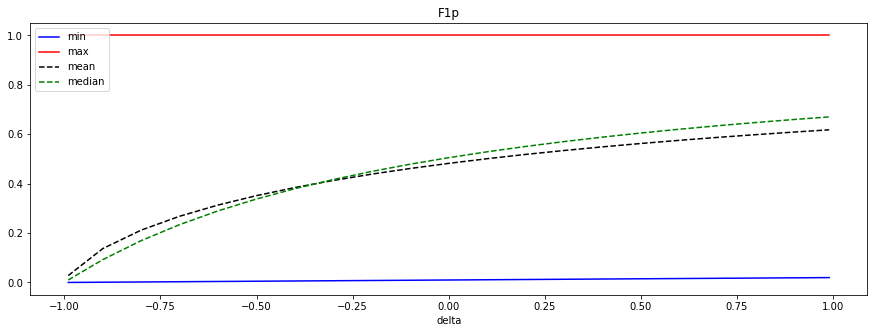

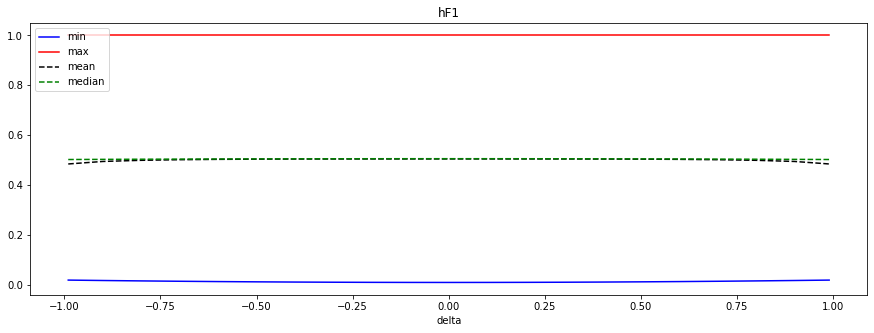

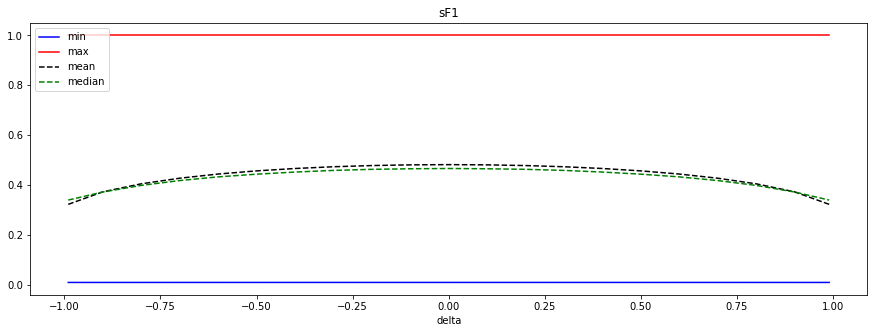

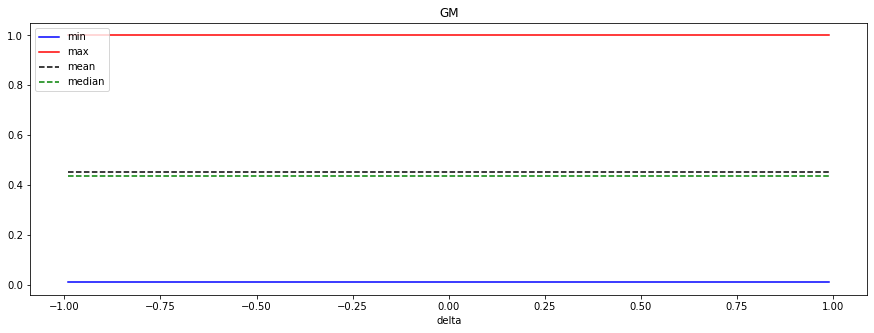

In [5]:
bins = np.arange(0, 1.02, 0.01)
for key in binary_metrics:
    distribs = np.zeros((len(deltas),len(bins)-1))
    mins = []
    maxs = []
    means = []
    medians = []
    plt.figure(figsize=(15,5))
    for i_d, delta in enumerate(deltas):
        mins.append(all_results[key][i_d].min())
        maxs.append(all_results[key][i_d].max())
        means.append(all_results[key][i_d].mean())
        medians.append(np.median(all_results[key][i_d]))
    plt.plot(deltas, mins, 'b-', label='min')
    plt.plot(deltas, maxs, 'r-', label='max')
    plt.plot(deltas, means, 'k--', label='mean')
    plt.plot(deltas, medians, 'g--', label='median')
    plt.legend(loc=2)
    plt.xlabel('delta')
    plt.title(key)
    plt.show()

**Summary graph: spread of all metrics' values (max-min) based on imbalance factor**

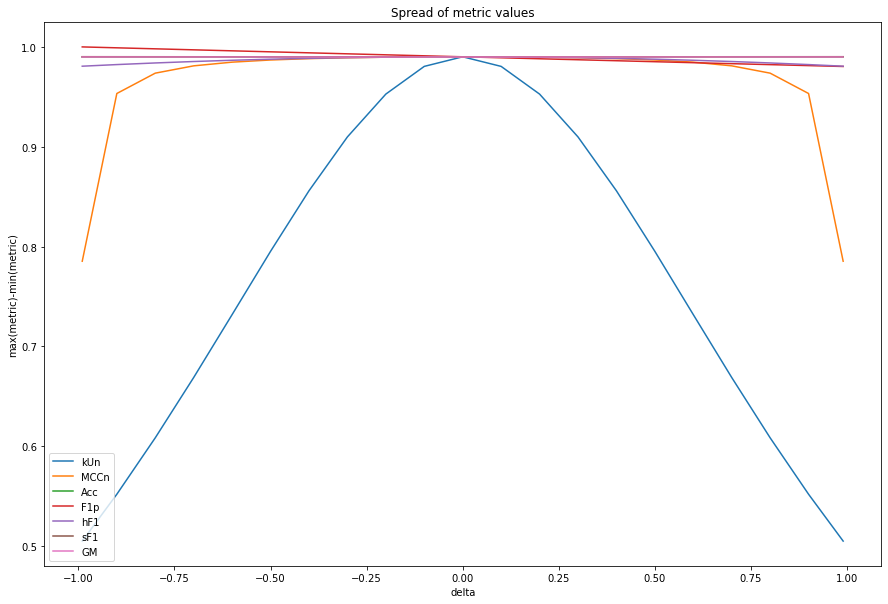

In [6]:
bins = np.arange(0, 1.02, 0.01)
plt.figure(figsize=(15,10))
for key in binary_metrics:
    distribs = np.zeros((len(deltas),len(bins)-1))
    mins = []
    maxs = []
    means = []
    medians = []
    for i_d, delta in enumerate(deltas):
        mins.append(all_results[key][i_d].min())
        maxs.append(all_results[key][i_d].max())
        means.append(all_results[key][i_d].mean())
        medians.append(np.median(all_results[key][i_d]))
    spreads = np.array(maxs)-np.array(mins)
    plt.plot(deltas, spreads, label=key)
plt.legend(loc=3)
plt.xlabel('delta')
plt.ylabel('max(metric)-min(metric)')
plt.title("Spread of metric values")
plt.show()

**Biases compared to the balanced case**

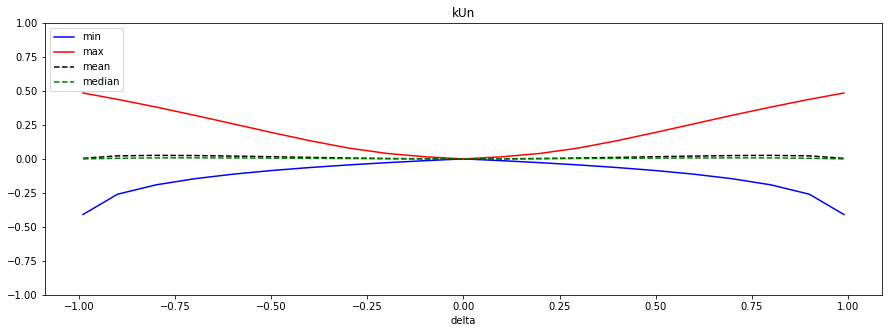

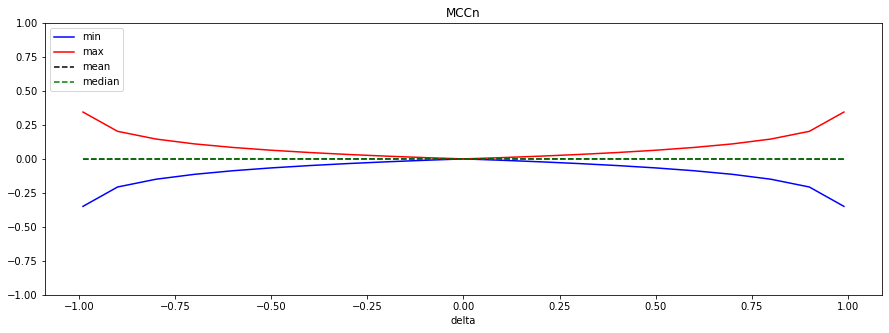

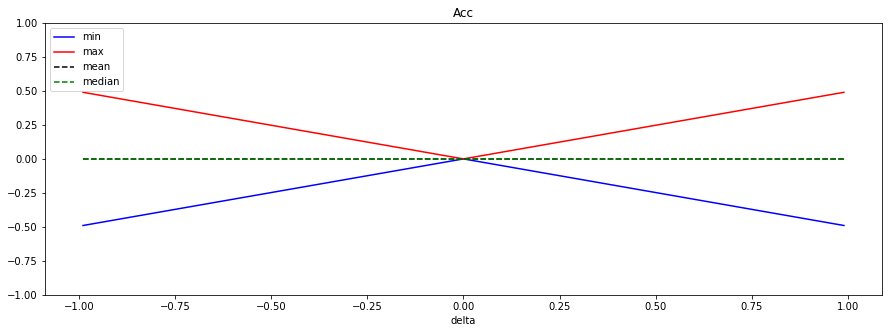

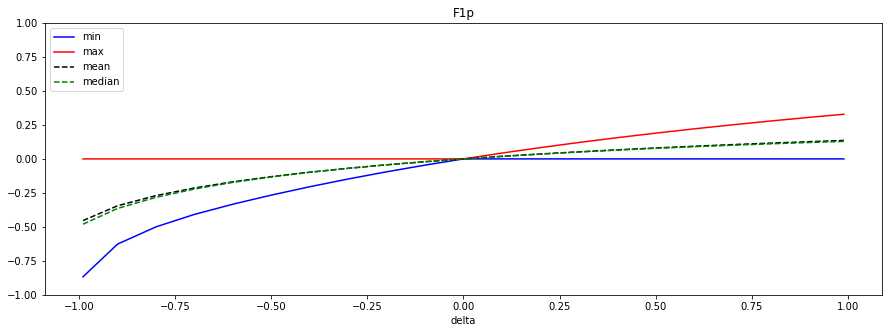

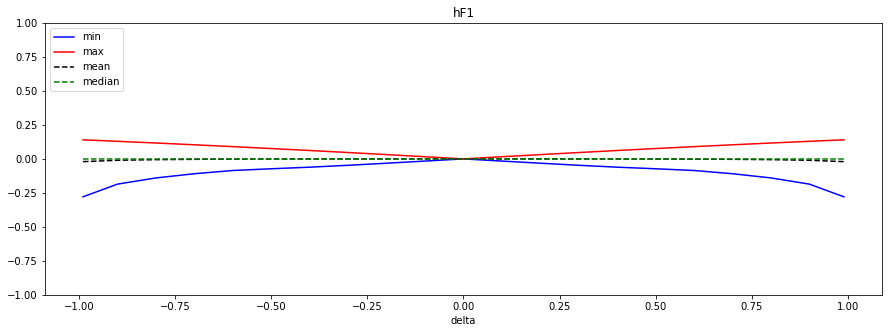

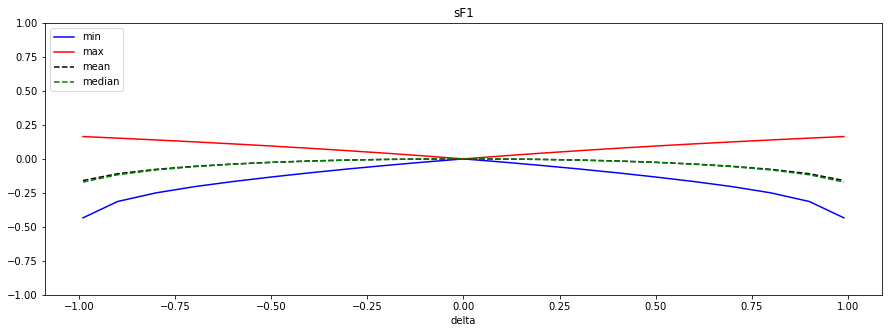

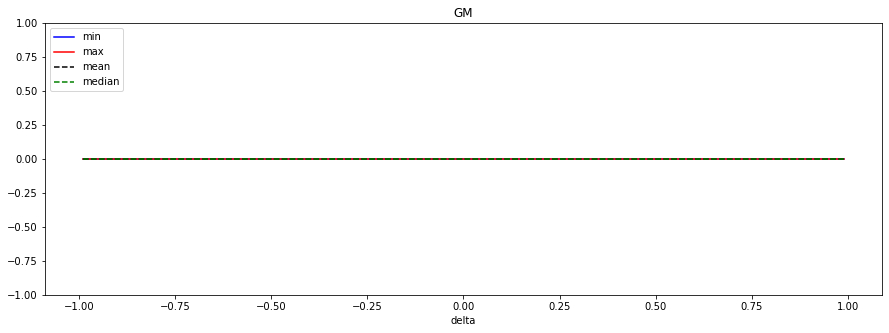

In [7]:
bins = np.arange(0, 1.02, 0.01)
for key in binary_metrics:
    distribs = np.zeros((len(deltas),len(bins)-1))
    balanced = all_results[key][len(deltas)//2]
    mins = []
    maxs = []
    means = []
    medians = []
    plt.figure(figsize=(15,5))
    for i_d, delta in enumerate(deltas):
        bias = all_results[key][i_d]-balanced
        mins.append(bias.min())
        maxs.append(bias.max())
        means.append(bias.mean())
        medians.append(np.median(bias))
    plt.plot(deltas, mins, 'b-', label='min')
    plt.plot(deltas, maxs, 'r-', label='max')
    plt.plot(deltas, means, 'k--', label='mean')
    plt.plot(deltas, medians, 'g--', label='median')
    plt.legend(loc=2)
    plt.xlabel('delta')
    plt.ylim([-1, 1])
    plt.title(key)
    plt.show()

**Spread (max-min) of the biases**

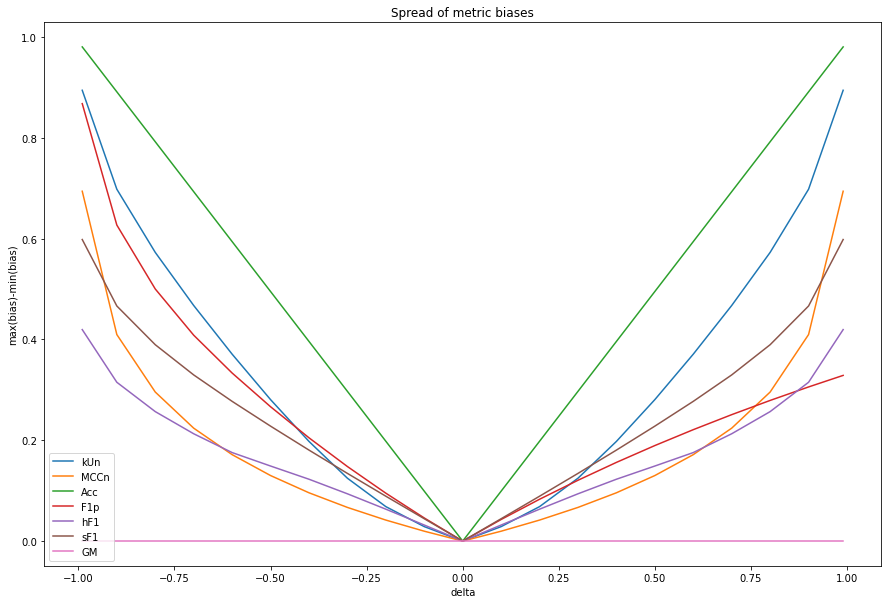

In [8]:
bins = np.arange(0, 1.02, 0.01)
plt.figure(figsize=(15,10))
for key in binary_metrics:
    distribs = np.zeros((len(deltas),len(bins)-1))
    balanced = all_results[key][len(deltas)//2]
    mins = []
    maxs = []
    means = []
    medians = []
    for i_d, delta in enumerate(deltas):
        bias = all_results[key][i_d]-balanced
        mins.append(bias.min())
        maxs.append(bias.max())
        means.append(bias.mean())
        medians.append(np.median(bias))
    spreads = np.array(maxs)-np.array(mins)
    plt.plot(deltas, spreads, label=key)
plt.legend(loc=3)
plt.xlabel('delta')
plt.ylabel('max(bias)-min(bias)')
plt.title("Spread of metric biases")
plt.show()

**Sensitivity maps of metric values for different delta values**

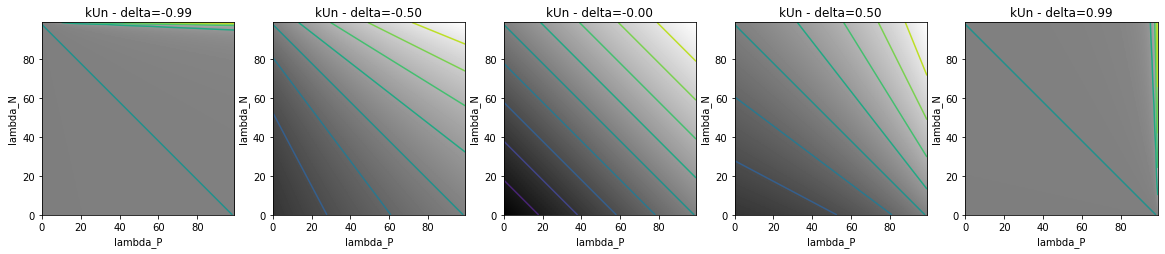

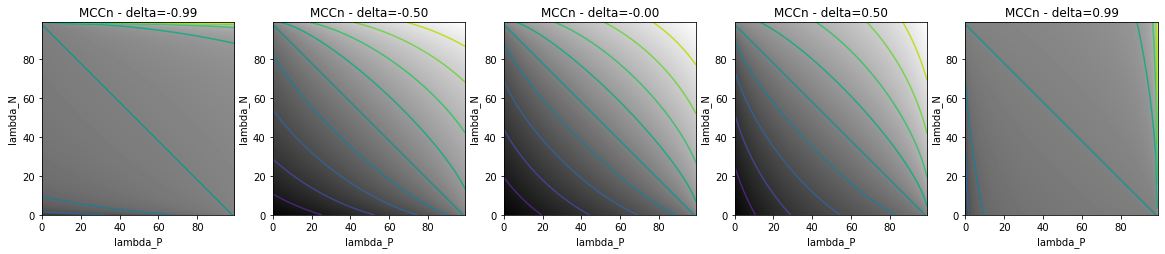

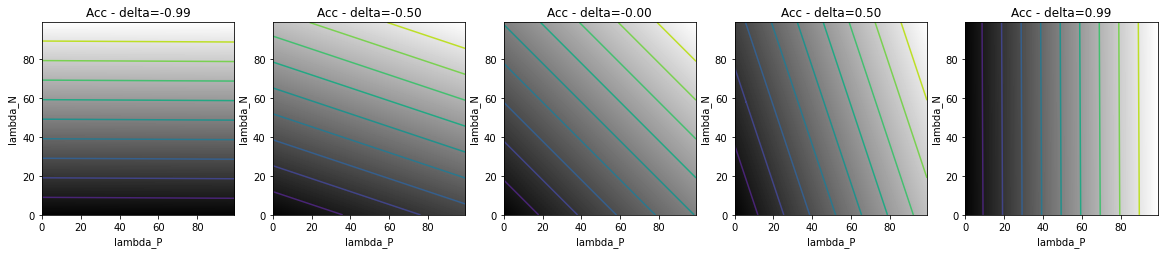

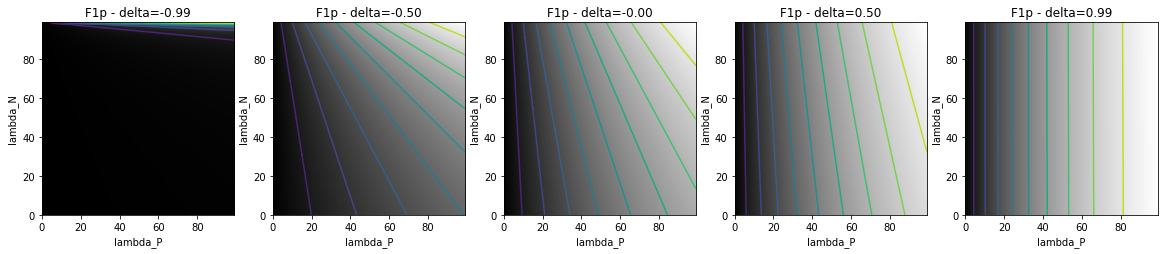

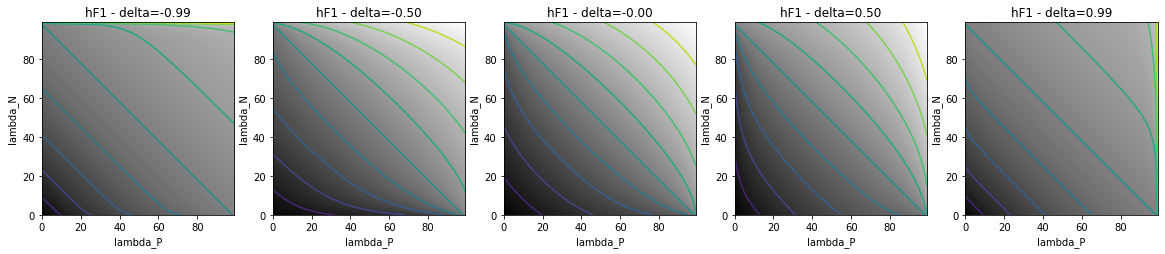

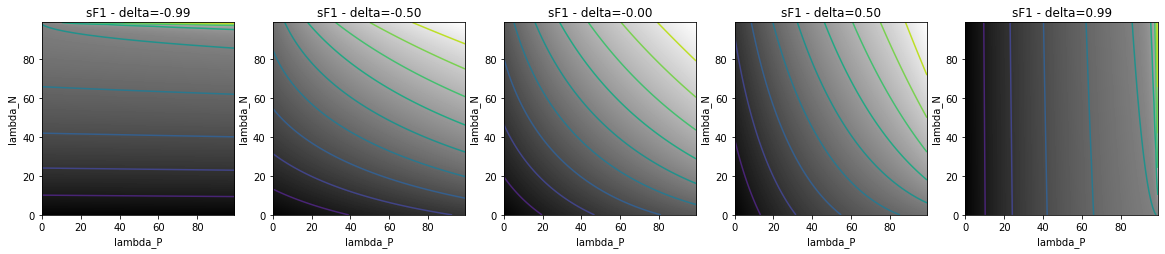

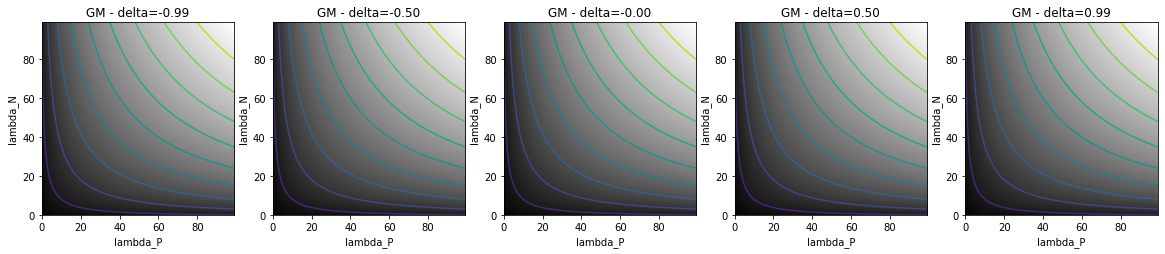

In [9]:
deltas_to_show = np.array([0, len(deltas)//4, len(deltas)//2, 3*len(deltas)//4, -1])
for key,metric in binary_metrics.items():
    plt.figure(figsize=(20,5))
    for i, i_d in enumerate(deltas_to_show):
        plt.subplot(1, 5, i+1)
        res_mat = all_results[key][i_d]
        plt.imshow(res_mat, vmin=0, vmax=1, cmap=plt.cm.gray)
        plt.contour(res_mat, levels=np.arange(0, 1.01, .1))
        plt.title(f'{key} - delta={deltas[i_d]:.2f}')
        plt.ylabel('lambda_N')
        plt.xlabel('lambda_P')
        plt.xlim([0, 99])
        plt.ylim([0, 99])
    plt.savefig(f'unbalanced_{key}.png')
    plt.show()

**Sensitivity maps of metric biases for different delta values**

C:\Users\Administrateur\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
C:\Users\Administrateur\anaconda3\envs\tf_gpu\lib\site-packages\mpl_toolkits\axes_grid1\axes_grid.py:46: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid1.colorbar module was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use matplotlib.colorbar instead.
  from .colorbar import Colorbar


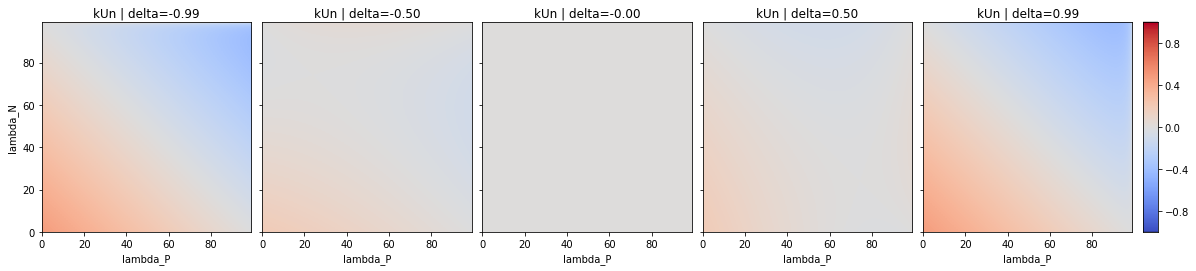

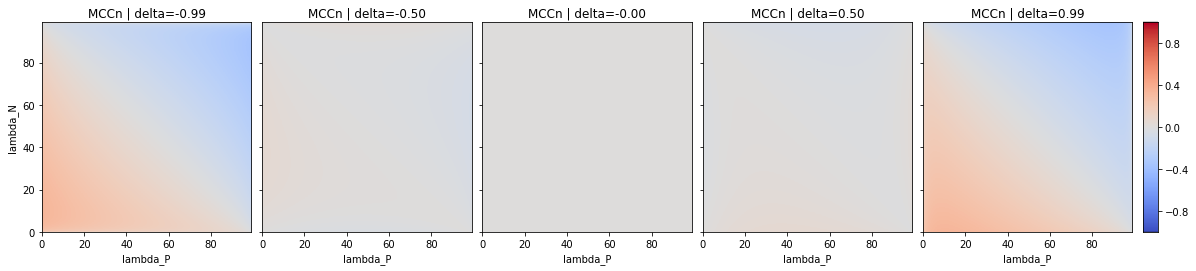

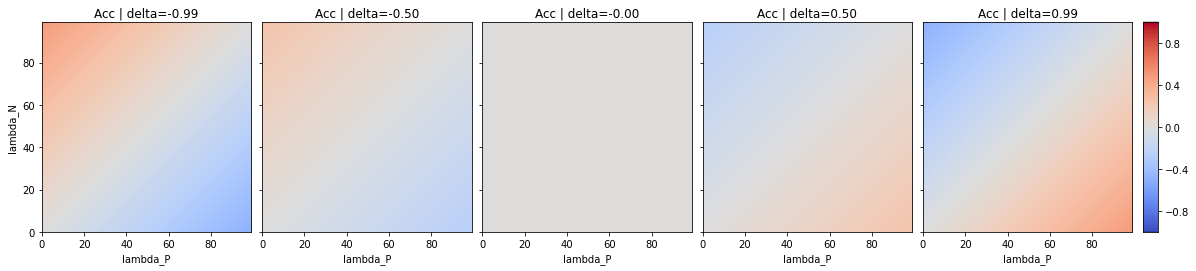

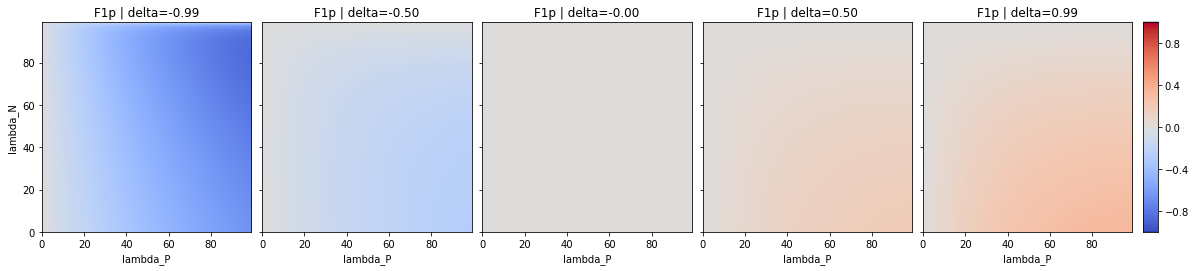

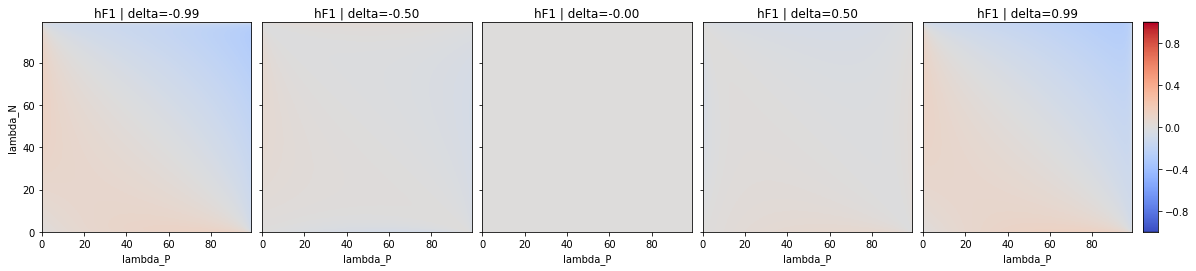

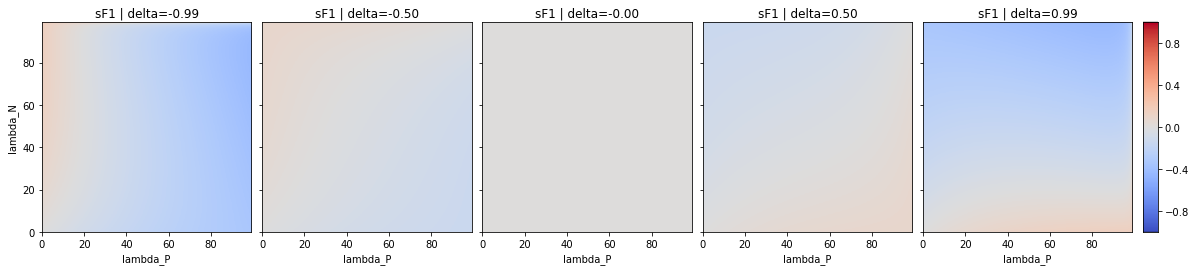

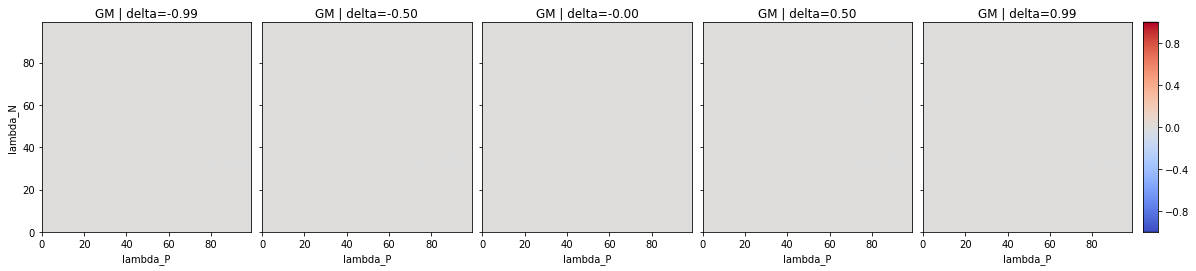

In [10]:
from mpl_toolkits.axes_grid1 import ImageGrid

deltas_to_show = np.array([0, len(deltas)//4, len(deltas)//2, 3*len(deltas)//4, -1])
for key,metric in binary_metrics.items():
    balanced = all_results[key][len(deltas)//2]
    fig = plt.figure(figsize=(20,5))
    grid = ImageGrid(fig, 111, nrows_ncols=(1, 5), 
                    axes_pad=0.15, 
                    share_all=True, 
                    cbar_location="right", 
                    cbar_mode="single",
                    cbar_size="7%",
                    cbar_pad=0.15)
    for i, (i_d, ax) in enumerate(zip(deltas_to_show, grid)):
        res_mat = all_results[key][i_d]-balanced
        im = ax.imshow(res_mat, vmin=-1, vmax=1, cmap=plt.cm.coolwarm)
        ax.set_title(f'{key} | delta={deltas[i_d]:.2f}')
        ax.set_ylabel('lambda_N')
        ax.set_xlabel('lambda_P')
        ax.set_xlim([0, 99])
        ax.set_ylim([0, 99])
    ax.cax.colorbar(im)
    plt.savefig(f'unbalanced_{key}_biases.png')
    plt.show()

**Range of biases**

In [11]:
for key,metric in binary_metrics.items():
    balanced = all_results[key][len(deltas)//2]
    all_biases = all_results[key] - balanced
    print(f"{key}: [{all_biases.min():.2f}, {all_biases.max():.2f}]")

kUn: [-0.41, 0.49]
MCCn: [-0.35, 0.34]
Acc: [-0.49, 0.49]
F1p: [-0.87, 0.33]
hF1: [-0.28, 0.14]
sF1: [-0.43, 0.16]
GM: [-0.00, 0.00]
